In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# CSV 파일 경로
file_path = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/AAME.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# 데이터 확인
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [5]:
df = df.drop('Date', axis=1)
df

,Open,High,Low,Close,Adj Close,Volume
0,0.00,4.05,3.85,3.85,3.213167,15000
1,0.00,4.00,3.80,3.80,3.171437,10200
2,0.00,4.05,3.85,3.85,3.213167,33500
3,0.00,4.00,3.80,3.80,3.171437,8700
4,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...
10093,2.29,2.29,2.08,2.28,2.280000,1600
10094,2.25,2.25,2.21,2.25,2.250000,500
10095,2.25,2.25,2.13,2.13,2.130000,400
10096,2.11,2.11,2.11,2.11,2.110000,300


In [7]:
df = df.drop('Volume', axis=1)
df = df.drop('Adj Close', axis=1)
df

,Open,High,Low,Close
0,0.00,4.05,3.85,3.85
1,0.00,4.00,3.80,3.80
2,0.00,4.05,3.85,3.85
3,0.00,4.00,3.80,3.80
4,0.00,3.95,3.75,3.75
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [9]:
#데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(df)

In [11]:
#마지막 2000개를 테스트로, 트레인 테스트 분리
TEST_SIZE = 2000
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [13]:
#함수 정의
def make_sample(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window, :3])     # 30일간 open, high, low
        y.append(data[i+window, 3])        # 다음날 close
    return np.array(X), np.array(y)

X_train, y_train = make_sample(train_data, 30)
X_test, y_test = make_sample(test_data, 30)

In [15]:
X_train.shape

(8068, 30, 3)

In [17]:
y_train.shape

(8068,)

In [19]:
X_test.shape

(1970, 30, 3)

In [21]:
y_test.shape

(1970,)

In [23]:
#LSTM 모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1], X_train.shape[2]),
               activation='tanh',
               return_sequences=False)
         )
model.add(Dense(1))

C:\Users\dpfkd\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0025
Epoch 2/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.7970e-04
Epoch 3/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.4390e-04
Epoch 4/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.2567e-04
Epoch 5/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.3818e-04
Epoch 6/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.2295e-04
Epoch 7/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.1410e-04
Epoch 8/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.2674e-04
Epoch 9/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.0730e-04
Epoch 10/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.1116e-04
Epoch 11/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.0273e-04
Epoch 12/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.0577e-04
Epoch 13/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9.8219e-05
Epoch 14/100
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 9.

In [27]:
#예측
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


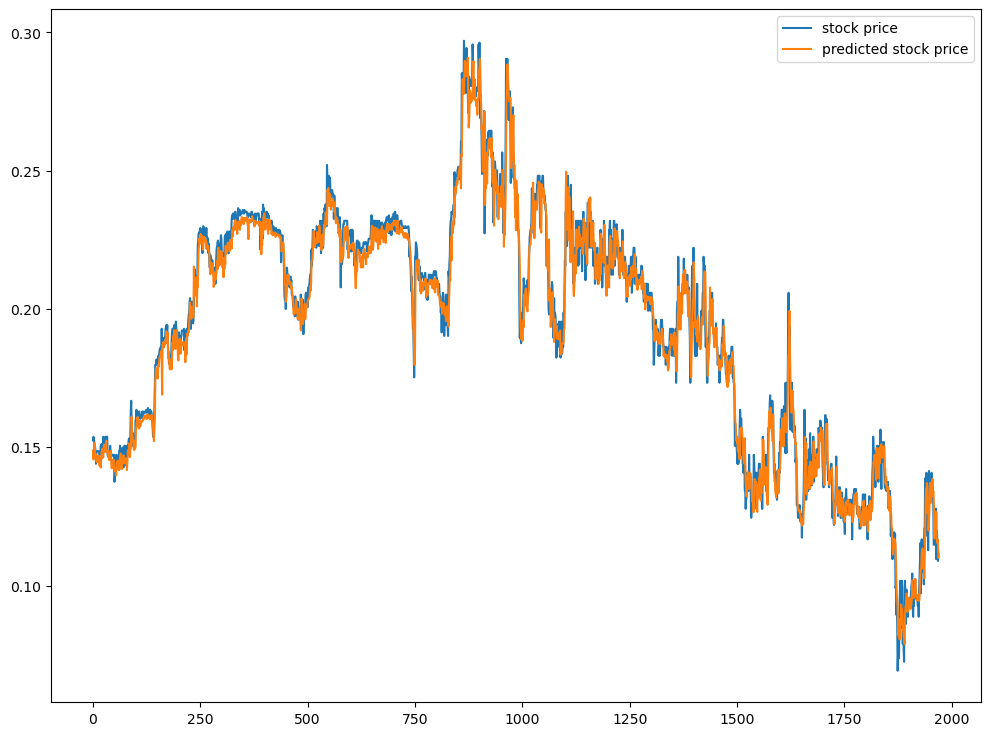

In [29]:
#시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()